In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Dropout, Activation, Flatten)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
path = os.listdir("/media/dolan/Backup Plus/Bodybuilders")
len(path)

396

In [11]:
len(os.listdir("/media/dolan/Backup Plus/Natty"))

387

In [38]:
class Data:
    
    def __init__(self):
        self.bodybuilders = []
        self.natties = []
        self.training_data = []
        self.test_data = []
        self.path = "/media/dolan/Backup Plus/"
        self.IMG_SIZE = 75
    
    def generate(self, string): #string === pathnameend
        path = os.path.join(self.path, string)
        if string == 'Bodybuilders':
            class_num = 1
        elif string == 'Natty':
            class_num = 0
        else:
            return
        counter = 0
        for img in os.listdir(path):
            if class_num == 1:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.bodybuilders.append([new_array,class_num])
                except Exception as e:
                    pass     
            elif class_num == 0:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.natties.append([new_array,class_num])
                except Exception as e:
                    pass   
            else:
                print("Classnum is not valid friend")
                
            counter += 1
            
            print("Image resized: ", counter)


In [39]:
data = Data()
data.generate('Bodybuilders')
data.generate('Natty')

Image resized:  1
Image resized:  2
Image resized:  3
Image resized:  4
Image resized:  5
Image resized:  6
Image resized:  7
Image resized:  8
Image resized:  9
Image resized:  10
Image resized:  11
Image resized:  12
Image resized:  13
Image resized:  14
Image resized:  15
Image resized:  16
Image resized:  17
Image resized:  18
Image resized:  19
Image resized:  20
Image resized:  21
Image resized:  22
Image resized:  23
Image resized:  24
Image resized:  25
Image resized:  26
Image resized:  27
Image resized:  28
Image resized:  29
Image resized:  30
Image resized:  31
Image resized:  32
Image resized:  33
Image resized:  34
Image resized:  35
Image resized:  36
Image resized:  37
Image resized:  38
Image resized:  39
Image resized:  40
Image resized:  41
Image resized:  42
Image resized:  43
Image resized:  44
Image resized:  45
Image resized:  46
Image resized:  47
Image resized:  48
Image resized:  49
Image resized:  50
Image resized:  51
Image resized:  52
Image resized:  53
Im

Image resized:  241
Image resized:  242
Image resized:  243
Image resized:  244
Image resized:  245
Image resized:  246
Image resized:  247
Image resized:  248
Image resized:  249
Image resized:  250
Image resized:  251
Image resized:  252
Image resized:  253
Image resized:  254
Image resized:  255
Image resized:  256
Image resized:  257
Image resized:  258
Image resized:  259
Image resized:  260
Image resized:  261
Image resized:  262
Image resized:  263
Image resized:  264
Image resized:  265
Image resized:  266
Image resized:  267
Image resized:  268
Image resized:  269
Image resized:  270
Image resized:  271
Image resized:  272
Image resized:  273
Image resized:  274
Image resized:  275
Image resized:  276
Image resized:  277
Image resized:  278
Image resized:  279
Image resized:  280
Image resized:  281
Image resized:  282
Image resized:  283
Image resized:  284
Image resized:  285
Image resized:  286
Image resized:  287
Image resized:  288
Image resized:  289
Image resized:  290


In [40]:
print(len(data.bodybuilders), len(data.natties))

396 387


In [41]:
#Shuffle the data
import random

data_ = data.bodybuilders + data.natties
print(len(data_))

random.shuffle(data_)

0.25 * len(data_),0.75 * len(data_) 


783


(195.75, 587.25)

In [42]:
len(data_[:587])

587

In [43]:
def generate_inputs(dataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i][0])
        y.append(dataset[i][1])
        
    return X,y
        

training_data = data_[:587]
test_data = data_[587:]    
    
X_train, y_train = generate_inputs(training_data)
X_test, y_test = generate_inputs(test_data)
X, y = generate_inputs(data_)

In [44]:
len(X_train), len(y_test)

(587, 196)

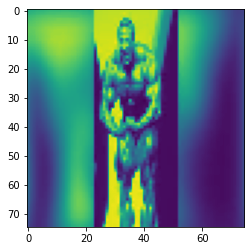

In [45]:
plt.imshow(X_train[5])

In [46]:
#Develop valid dataset by normalizing image arrays`

IMG_SIZE = data.IMG_SIZE
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_train = X_train/255.0
X_test = X_test/255.0
X = X/255.0

y = np.array(y)

In [47]:
y.shape, X.shape

((783,), (783, 75, 75, 1))

In [140]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [226]:
model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 73, 73, 256)       2560      
                                                                 
 activation_48 (Activation)  (None, 73, 73, 256)       0         
                                                                 
 dropout_35 (Dropout)        (None, 73, 73, 256)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_49 (Activation)  (None, 22, 22, 256)       0         
                                                     

In [175]:
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.fit(X, y,  batch_size = 15, epochs = 15, validation_split = 0.25)

Epoch 1/15
40/40 [==============================] - 35s 868ms/step - loss: 0.1592 - accuracy: 0.9523 - val_loss: 0.6454 - val_accuracy: 0.7500
Epoch 2/15
40/40 [==============================] - 40s 1s/step - loss: 0.1040 - accuracy: 0.9676 - val_loss: 0.7577 - val_accuracy: 0.7500
Epoch 3/15
40/40 [==============================] - 37s 931ms/step - loss: 0.1033 - accuracy: 0.9625 - val_loss: 0.7307 - val_accuracy: 0.7602
Epoch 4/15
40/40 [==============================] - 37s 922ms/step - loss: 0.0752 - accuracy: 0.9761 - val_loss: 0.7910 - val_accuracy: 0.7398
Epoch 5/15
40/40 [==============================] - 36s 894ms/step - loss: 0.0577 - accuracy: 0.9813 - val_loss: 0.9319 - val_accuracy: 0.7143
Epoch 6/15
40/40 [==============================] - 56s 1s/step - loss: 0.0684 - accuracy: 0.9761 - val_loss: 0.8401 - val_accuracy: 0.7398
Epoch 7/15
40/40 [==============================] - 54s 1s/step - loss: 0.0986 - accuracy: 0.9608 - val_loss: 0.8294 - val_accuracy: 0.7398
Epoch 8/

KeyboardInterrupt: 

In [176]:
#Predict whether the image is of a dog or of a cat!!!

def predict(data):
    if data.shape == (len(data), IMG_SIZE, IMG_SIZE, 1):
        preds = model.predict(data).tolist()
        
        for i in range(len(preds)):
            if preds[i][0] >= 0.5:
                preds[i] = 'Not'
            elif preds[i][0] < 0.5:
                preds[i] = 'Natty'
        
        return preds
    elif data.shape == (IMG_SIZE, IMG_SIZE, 1):
        data = np.expand_dims(data, axis = 0)
        pred = model.predict(data)
        if pred >= 0.5:
            pred = 'Not'
        else:
            pred = 'Natty'
            
        return pred
    
    else:
        return
        
        

In [177]:
preds = model.predict(X_test)

In [178]:
predict(X_test[8])

'Natty'

(<matplotlib.image.AxesImage at 0x7f939230c640>,
 array([0.5187222], dtype=float32))

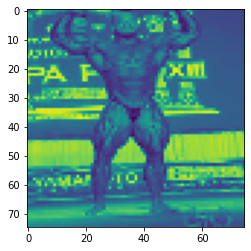

In [230]:
plt.imshow(X_test[1]), preds[1]

(<matplotlib.image.AxesImage at 0x7f9358af84c0>,
 array([0.92384], dtype=float32))

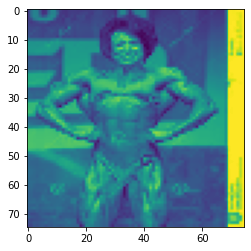

In [180]:
plt.imshow(X_test[7]), preds[7]

(<matplotlib.image.AxesImage at 0x7f9358a4ae50>,
 array([0.00461218], dtype=float32))

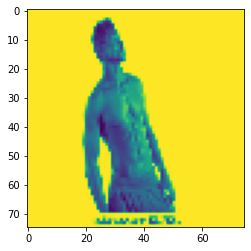

In [181]:
plt.imshow(X_test[2]), preds[2]

(<matplotlib.image.AxesImage at 0x7f9358a396d0>,
 array([0.9999578], dtype=float32))

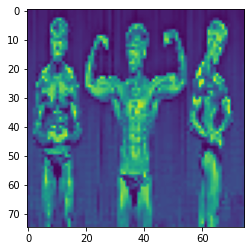

In [182]:
plt.imshow(X_test[35]), preds[35]

(<matplotlib.image.AxesImage at 0x7f9392503eb0>,
 array([0.998507], dtype=float32))

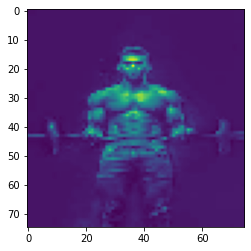

In [219]:
plt.imshow(X_test[171]), preds[171]

# Save The Model

In [221]:
model.save("/home/dolan/Downloads/NattyOrNot/machine_learning/.ipynb_checkpoints/nattyornot.h5")

### Generate Stack to List Most recent Image

In [76]:
path = '/home/dolan/Downloads/NattyOrNot/backend/media/images'
#len(path)

def generate(string): #string === pathnameend
    path = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
    path = os.path.join(path, string)
    IMG_SIZE = 75#125
    
    counter = 0
    
    arr = []
    
    try:
        img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        #arr.append([new_array,class_num])
    except Exception as e:
        pass     



        counter += 1

        print("Image resized: ", counter)
    return new_array


images_path = os.listdir('/home/dolan/Downloads/NattyOrNot/backend/media/images')
most_recent_upload = images_path.pop(0)
print(most_recent_upload)

download.jpeg


In [77]:
img_array = generate(most_recent_upload)
img_array

array([[ 30,  45,  48, ...,  77,  86,  82],
       [ 78,  73,  47, ...,  70,  88,  84],
       [ 54,  62,  34, ...,  83, 171, 205],
       ...,
       [ 34,  41,  47, ...,  67,  67,  64],
       [ 43,  43,  43, ...,  67,  65,  66],
       [ 45,  45,  45, ...,  68,  67,  66]], dtype=uint8)

In [78]:
#Convert to numpy array in order to feed data to neural network
IMG_SIZE = 75#125
img_array_ = np.array(img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
img_array_ = img_array_/255.0


In [79]:
img_array.shape, img_array_.shape, img_array_

((75, 75),
 (1, 75, 75, 1),
 array([[[[0.11764706],
          [0.17647059],
          [0.18823529],
          ...,
          [0.30196078],
          [0.3372549 ],
          [0.32156863]],
 
         [[0.30588235],
          [0.28627451],
          [0.18431373],
          ...,
          [0.2745098 ],
          [0.34509804],
          [0.32941176]],
 
         [[0.21176471],
          [0.24313725],
          [0.13333333],
          ...,
          [0.3254902 ],
          [0.67058824],
          [0.80392157]],
 
         ...,
 
         [[0.13333333],
          [0.16078431],
          [0.18431373],
          ...,
          [0.2627451 ],
          [0.2627451 ],
          [0.25098039]],
 
         [[0.16862745],
          [0.16862745],
          [0.16862745],
          ...,
          [0.2627451 ],
          [0.25490196],
          [0.25882353]],
 
         [[0.17647059],
          [0.17647059],
          [0.17647059],
          ...,
          [0.26666667],
          [0.2627451 ],
          [

In [80]:
model.predict(img_array_) 

array([[0.6355746]], dtype=float32)

(<matplotlib.image.AxesImage at 0x7f931867d670>,
 array([[0.6355746]], dtype=float32))

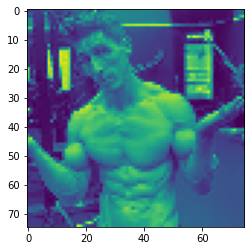

In [81]:
plt.imshow(img_array), model.predict(img_array_)

('Not',
 array([0.63557464], dtype=float32))

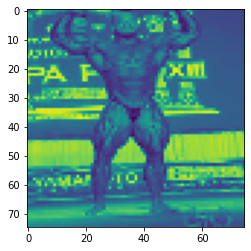

In [82]:
predict(X_test[1]), plt.imshow(X_test[1]), preds[1]

In [83]:
images_path

['Angel_Of_Death.jpg',
 'moi.jpg',
 'meals.jpg',
 'Angel_Of_Death_1RAngKg.jpg',
 'meals_jczglqC.jpg']

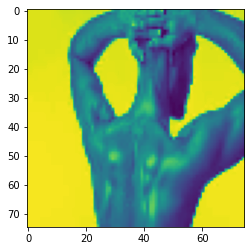

In [84]:
plt.imshow(X_test[31])

array([[0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464],
       [0.63557464]], dtype=float32)